# 2022 Canadian Grand Prix Analysis

In [1]:
# !jt -t grade3 -T -f liberation -tf loraserif -fs 11 -ofs 10 -dfs 10 -tfs 11 -lineh 150 -cursw 3 -cursc r -cellw 100%

In [2]:
# !jt -t gruvboxd -T -f liberation -tf loraserif -fs 11 -ofs 10 -dfs 11 -tfs 11 -lineh 150 -cursw 3 -cursc r -cellw 100%

In [3]:
import fastf1 as ff1
from fastf1 import plotting
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1', misc_mpl_mods=True)
from fastf1 import utils
from fastf1.core import Laps
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from timple.timedelta import strftimedelta
plotting.setup_mpl()
ff1.Cache.enable_cache('C:/Users/EDGAR/Jupyter Files/FastF1Cache')

## Qualifying Analysis

In [4]:
year=2022
circuit='Canadian Grand Prix'
quali=ff1.get_session(year,circuit,'Q')
quali.load()
laps=quali.load_laps()

utils          INFO 	Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
utils          INFO 	NumExpr defaulting to 8 threads.
core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v2.2.7]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '55', '44', '20', '47', '31', '63', '3', '24', '77', '23', '11', '4', '16', '10', '5', '18', '6', '22']
C:\

In [5]:
laps2=pd.DataFrame(quali.laps)
# quali.results[['Q3','LastName']]

In [6]:
#Aggregating the two DataFrames into one, to be easier to work with.
results=pd.DataFrame(quali.results)
fsq=laps2.copy()
fsq=pd.merge(fsq,results,on='DriverNumber',how='outer')
fsq=fsq.drop(['Time_y','Status','Points','GridPosition'],axis=1)
fsq=fsq.rename(columns={'Time_x':'Time'})
fsq

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,Q1,Q2,Q3
0,0 days 00:17:16.656000,1,0 days 00:01:59.903000,1,1,0 days 00:15:21.292000,NaT,0 days 00:00:39.496000,0 days 00:00:33.924000,0 days 00:00:46.483000,0 days 00:15:56.315000,0 days 00:16:30.211000,0 days 00:17:16.732000,165.0,227.0,260.0,186.0,False,WET,5.0,False,0 days 00:15:21.292000,Red Bull Racing,VER,1,False,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:32.219000,0 days 00:01:23.746000,0 days 00:01:21.299000
1,0 days 00:18:54.091000,1,0 days 00:01:37.435000,2,1,NaT,NaT,0 days 00:00:28.616000,0 days 00:00:31.162000,0 days 00:00:37.657000,0 days 00:17:45.272000,0 days 00:18:16.434000,0 days 00:18:54.091000,185.0,262.0,262.0,291.0,False,WET,6.0,False,0 days 00:17:16.656000,Red Bull Racing,VER,1,True,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:32.219000,0 days 00:01:23.746000,0 days 00:01:21.299000
2,0 days 00:20:29.921000,1,0 days 00:01:35.830000,3,1,NaT,NaT,0 days 00:00:27.951000,0 days 00:00:31.060000,0 days 00:00:36.819000,0 days 00:19:22.042000,0 days 00:19:53.102000,0 days 00:20:29.921000,198.0,264.0,264.0,294.0,False,WET,7.0,False,0 days 00:18:54.091000,Red Bull Racing,VER,1,True,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:32.219000,0 days 00:01:23.746000,0 days 00:01:21.299000
3,0 days 00:22:12.983000,1,0 days 00:01:43.062000,4,1,NaT,NaT,0 days 00:00:28.318000,0 days 00:00:30.755000,0 days 00:00:43.989000,0 days 00:20:58.239000,0 days 00:21:28.994000,0 days 00:22:12.983000,197.0,265.0,264.0,290.0,False,WET,8.0,False,0 days 00:20:29.921000,Red Bull Racing,VER,1,True,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:32.219000,0 days 00:01:23.746000,0 days 00:01:21.299000
4,0 days 00:23:53.412000,1,0 days 00:01:40.429000,5,1,NaT,NaT,0 days 00:00:27.892000,0 days 00:00:30.777000,0 days 00:00:41.760000,0 days 00:22:40.875000,0 days 00:23:11.652000,0 days 00:23:53.412000,198.0,265.0,265.0,214.0,False,WET,9.0,False,0 days 00:22:12.983000,Red Bull Racing,VER,1,True,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0 days 00:01:32.219000,0 days 00:01:23.746000,0 days 00:01:21.299000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0 days 00:35:22.114000,6,NaT,11,1,NaT,0 days 00:35:22.114000,0 days 00:00:35.365000,0 days 00:00:36.359000,NaT,0 days 00:34:13.878000,0 days 00:34:50.268000,NaT,161.0,243.0,NaN,281.0,False,WET,11.0,True,0 days 00:33:38.452000,Williams,LAT,1,False,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,19.0,0 days 00:01:35.660000,NaT,NaT
428,0 days 00:18:16.586000,22,0 days 00:02:21.669000,1,1,0 days 00:15:58.368000,NaT,0 days 00:00:39.951000,0 days 00:00:34.143000,0 days 00:01:07.575000,0 days 00:16:34.931000,0 days 00:17:09.052000,0 days 00:18:16.597000,167.0,247.0,257.0,73.0,False,WET,1.0,True,0 days 00:15:58.368000,AlphaTauri,TSU,1,False,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,20.0,0 days 00:01:36.575000,NaT,NaT
429,0 days 00:19:55.080000,22,0 days 00:01:38.494000,2,1,NaT,NaT,0 days 00:00:29.322000,0 days 00:00:31.651000,0 days 00:00:37.521000,0 days 00:18:45.908000,0 days 00:19:17.559000,0 days 00:19:55.080000,175.0,265.0,265.0,295.0,False,WET,2.0,True,0 days 00:18:16.586000,AlphaTauri,TSU,1,True,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,20.0,0 days 00:01:36.575000,NaT,NaT
430,0 days 00:21:31.655000,22,0 days 00:01:36.575000,3,1,NaT,NaT,0 days 00:00:28.055000,0 days 00:00:31.422000,0 days 00:00:37.098000,

### Fastest Sectors in Qualifying

In [7]:
s3=fsq.loc[fsq['Sector3Time']==min(fsq['Sector3Time'].dropna()),['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','LapNumber']]
s2=fsq.loc[fsq['Sector2Time']==min(fsq['Sector2Time'].dropna()),['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','LapNumber']]
s1=fsq.loc[fsq['Sector1Time']==min(fsq['Sector1Time'].dropna()),['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','LapNumber']]
s123=pd.concat([s1,s2,s3],ignore_index=True)
s123

,LapTime,Driver,Sector1Time,Sector2Time,Sector3Time,LapNumber
0,0 days 00:01:22.096000,SAI,0 days 00:00:23.149000,0 days 00:00:26.092000,0 days 00:00:32.855000,28
1,0 days 00:01:21.299000,VER,0 days 00:00:23.220000,0 days 00:00:25.951000,0 days 00:00:32.128000,29
2,0 days 00:01:21.299000,VER,0 days 00:00:23.220000,0 days 00:00:25.951000,0 days 00:00:32.128000,29


### Fastest Laps in Q1, Q2, Q3

In [8]:
flq1=fsq.loc[fsq['LapTime'] == min(fsq['Q1'].dropna())]
flq2=fsq.loc[fsq['LapTime'] == min(fsq['Q2'].dropna())]
flq3=fsq.loc[fsq['LapTime'] == min(fsq['Q3'].dropna())]
flqs=pd.concat([flq1,flq2,flq3],ignore_index=True)
flqs[['Driver','Team','Compound','Q1','Q2','Q3']]

,Driver,Team,Compound,Q1,Q2,Q3
0,VER,Red Bull Racing,WET,0 days 00:01:32.219000,0 days 00:01:23.746000,0 days 00:01:21.299000
1,VER,Red Bull Racing,WET,0 days 00:01:32.219000,0 days 00:01:23.746000,0 days 00:01:21.299000
2,VER,Red Bull Racing,INTERMEDIATE,0 days 00:01:32.219000,0 days 00:01:23.746000,0 days 00:01:21.299000


### Minisector Comparison Between Top 4 Qualifying Drivers

#### Who are the top 4 qualifying drivers?

In [9]:
quali.results[:4]
#LEC VER SAI RUS

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,0.0,0 days 00:01:32.219000,0 days 00:01:23.746000,0 days 00:01:21.299000,NaT,,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,2.0,0.0,0 days 00:01:32.277000,0 days 00:01:24.848000,0 days 00:01:21.944000,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,0.0,0 days 00:01:32.781000,0 days 00:01:25.197000,0 days 00:01:22.096000,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,0.0,0 days 00:01:33.841000,0 days 00:01:25.543000,0 days 00:01:22.891000,NaT,,0.0


In [10]:
#Getting the laps from all 4 drivers
llec=laps.pick_driver('LEC')
lver=laps.pick_driver('VER')
lsai=laps.pick_driver('SAI')
lrus=laps.pick_driver('RUS')
#Getting telemetry data from drivers
flec=llec.pick_fastest().get_telemetry().add_distance()
fver=lver.pick_fastest().get_telemetry().add_distance()
fsai=lsai.pick_fastest().get_telemetry().add_distance()
frus=lrus.pick_fastest().get_telemetry().add_distance()
#Creating Driver column
flec['Driver']='LEC'
fver['Driver']='VER'
fsai['Driver']='SAI'
frus['Driver']='RUS'
#Getting everything in one dataframe
t1=flec.append(fver)
t2=t1.append(fsai)
telemetry=t2.append(frus)

In [11]:
#Creating the minisectors (doing 30 - 10 per sector)
nmini=30
#Grabbing circuit distance
cdist=max(telemetry['Distance'])
#Dividing circuit distance by number of minisectors to have our minisector distance
minilen=cdist/nmini
#Calculating distances at which the next minisector begins
minis=[0]
for b in range(0,(nmini-1)):
    minis.append(minilen*(b+1))
#Assigning every row in the dataset to a minisector, so we always know which minisector the cars were located in.
telemetry['Minisector']=telemetry['Distance'].apply(
    lambda dist:(
        int((dist // minilen)+1)))

In [12]:
#Finding the fastest driver per minisector so we can color it in the minisector map
avgspeed=telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()
fastest = avgspeed.loc[avgspeed.groupby(['Minisector'])['Speed'].idxmax()]
fastest = fastest[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_Driver'})

In [13]:
fastest['Fastest_Driver'].unique()
#all 4 drivers had a fastest minisector

array(['VER', 'SAI', 'RUS'], dtype=object)

In [14]:
# Fastest driver per minisector + telemetry
telemetry = telemetry.merge(fastest, on=['Minisector'])

# Ordering by distance
telemetry = telemetry.sort_values(by=['Distance'])

# Converting driver name to integer
telemetry.loc[telemetry['Fastest_Driver'] == 'RUS', 'Fastest_Driver_int'] = 4
telemetry.loc[telemetry['Fastest_Driver'] == 'VER', 'Fastest_Driver_int'] = 2
telemetry.loc[telemetry['Fastest_Driver'] == 'LEC', 'Fastest_Driver_int'] = 1
telemetry.loc[telemetry['Fastest_Driver'] == 'SAI', 'Fastest_Driver_int'] = 3

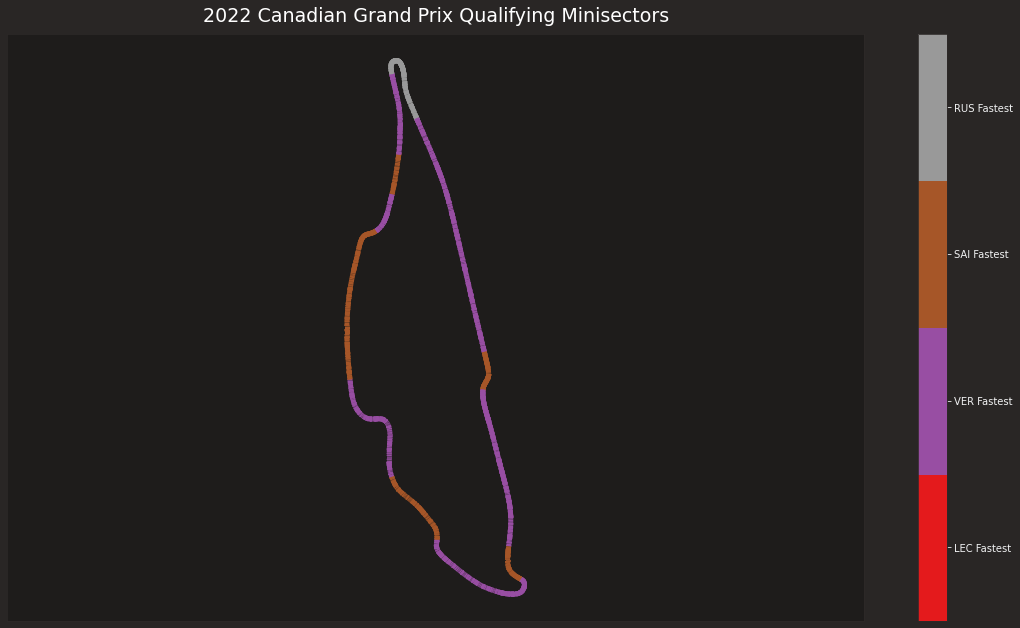

In [15]:
# Finally, plotting.
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_Driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('Set1', 4)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

# plt.rcParams['figure.figsize'] = [18, 10]
plt.gcf().set_size_inches(19.2,10.8)
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.title(f'{year} {circuit} Qualifying Minisectors',color='white')
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,6))
cbar.set_ticks(np.arange(1.5,6.5))
cbar.set_ticklabels(['LEC Fastest', 'VER Fastest','SAI Fastest','RUS Fastest'])

plt.savefig(f"{year} {circuit} Qualifying Minisectors.jpeg", dpi=100)

plt.show()

### Qualifying Time Difference Graph

In [16]:
#Getting every driver
drv = pd.unique(quali.laps['Driver'])
drv=np.array(drv)
drv

array(['VER', 'ALO', 'SAI', 'HAM', 'MAG', 'MSC', 'OCO', 'RUS', 'RIC',
       'ZHO', 'BOT', 'ALB', 'PER', 'NOR', 'LEC', 'GAS', 'VET', 'STR',
       'LAT', 'TSU'], dtype=object)

In [17]:
#Sorting laps by LapTime
fl_list= list()
for d in drv:
    drv_fl = quali.laps.pick_driver(d).pick_fastest()
    fl_list.append(drv_fl)
fl = Laps(fl_list).sort_values(by='LapTime').reset_index(drop=True)

In [18]:
#getting the fastest lap
pole=fl.pick_fastest()
fl['LapTimeDiff']=fl['LapTime']-pole['LapTime']
# print(fl[['Driver', 'LapTime', 'LapTimeDiff']])
# fl=fl.drop(index=19)
print(fl[['Driver', 'LapTime', 'LapTimeDiff']])

   Driver                LapTime            LapTimeDiff
0     VER 0 days 00:01:21.299000        0 days 00:00:00
1     ALO 0 days 00:01:21.944000 0 days 00:00:00.645000
2     SAI 0 days 00:01:22.096000 0 days 00:00:00.797000
3     HAM 0 days 00:01:22.891000 0 days 00:00:01.592000
4     MAG 0 days 00:01:22.960000 0 days 00:00:01.661000
5     MSC 0 days 00:01:23.356000 0 days 00:00:02.057000
6     OCO 0 days 00:01:23.529000 0 days 00:00:02.230000
7     RUS 0 days 00:01:23.557000 0 days 00:00:02.258000
8     RIC 0 days 00:01:23.749000 0 days 00:00:02.450000
9     ZHO 0 days 00:01:24.030000 0 days 00:00:02.731000
10    BOT 0 days 00:01:26.788000 0 days 00:00:05.489000
11    ALB 0 days 00:01:26.858000 0 days 00:00:05.559000
12    LEC 0 days 00:01:33.008000 0 days 00:00:11.709000
13    PER 0 days 00:01:33.127000 0 days 00:00:11.828000
14    NOR 0 days 00:01:34.066000 0 days 00:00:12.767000
15    GAS 0 days 00:01:34.492000 0 days 00:00:13.193000
16    VET 0 days 00:01:34.512000 0 days 00:00:13

In [19]:
#creating a list of team colors for the graph
tcol = list()
for index, lap in fl.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
#     print(lap['Team'])
    tcol.append(color)

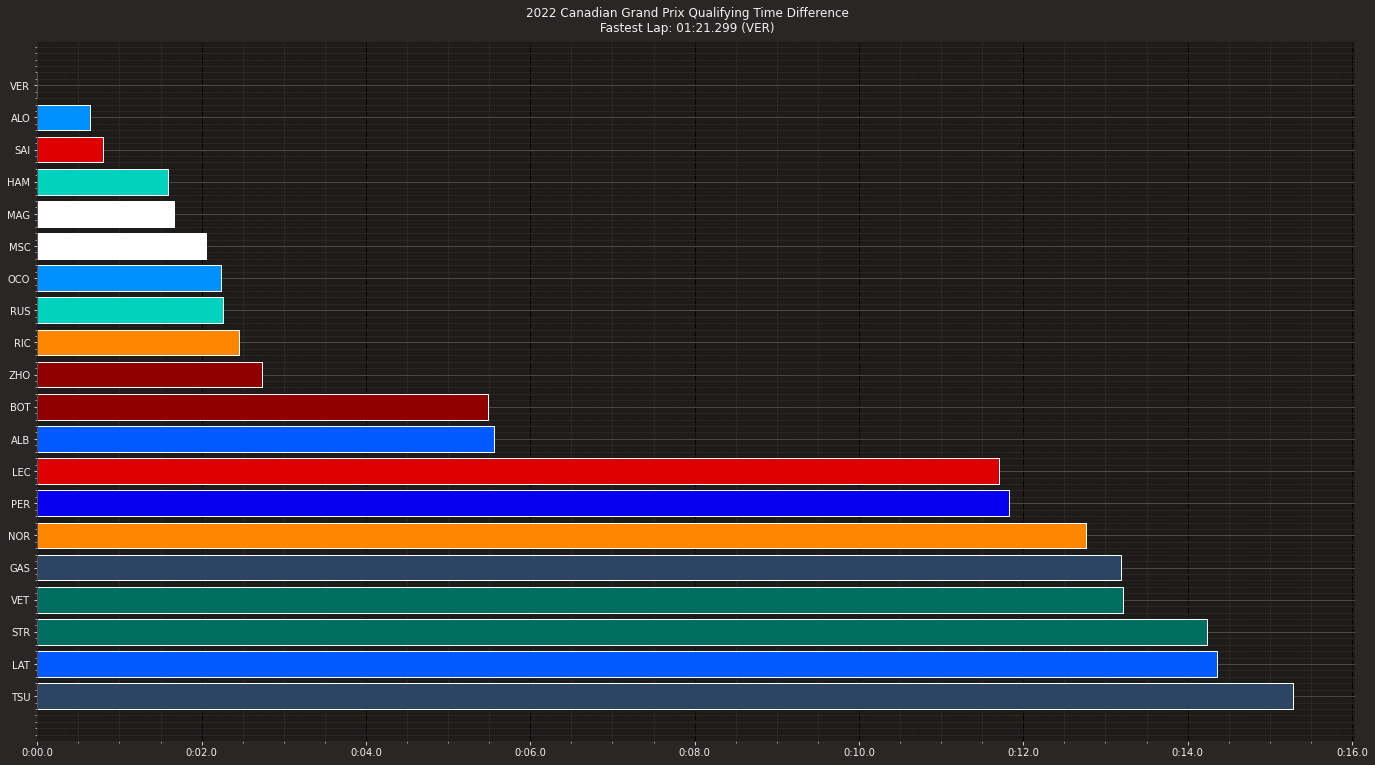

In [20]:
#Finally, plotting and titling
fig, ax = plt.subplots(tight_layout=True)
plt.gcf().set_size_inches(19.2,10.8)
ax.barh(fl.index, fl['LapTimeDiff'],color=tcol, edgecolor='white')
ax.set_yticks(fl.index)
ax.set_yticklabels(fl['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='-.', color='black', zorder=-1000)
lapstr = strftimedelta(pole['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Qualifying Time Difference\n"
             f"Fastest Lap: {lapstr} ({pole['Driver']})")
plt.savefig(f"{year} {circuit} Qualifying Time Difference.jpeg", dpi=100)

plt.show()

### Qualifying Speed Over Distance Analysis - Top 4 Drivers

In [21]:
llec=laps.pick_driver('LEC')
lver=laps.pick_driver('VER')
lsai=laps.pick_driver('SAI')
lrus=laps.pick_driver('RUS')
#Getting telemetry data from drivers
flec=llec.pick_fastest().get_telemetry().add_distance()
fver=lver.pick_fastest().get_telemetry().add_distance()
fsai=lsai.pick_fastest().get_telemetry().add_distance()
frus=lrus.pick_fastest().get_telemetry().add_distance()
#Creating Driver column
flec['Driver']='LEC'
fver['Driver']='VER'
fsai['Driver']='SAI'
frus['Driver']='RUS'
#Getting everything in one dataframe
t1=flec.append(fver)
t2=t1.append(fsai)
telemetry=t2.append(frus)

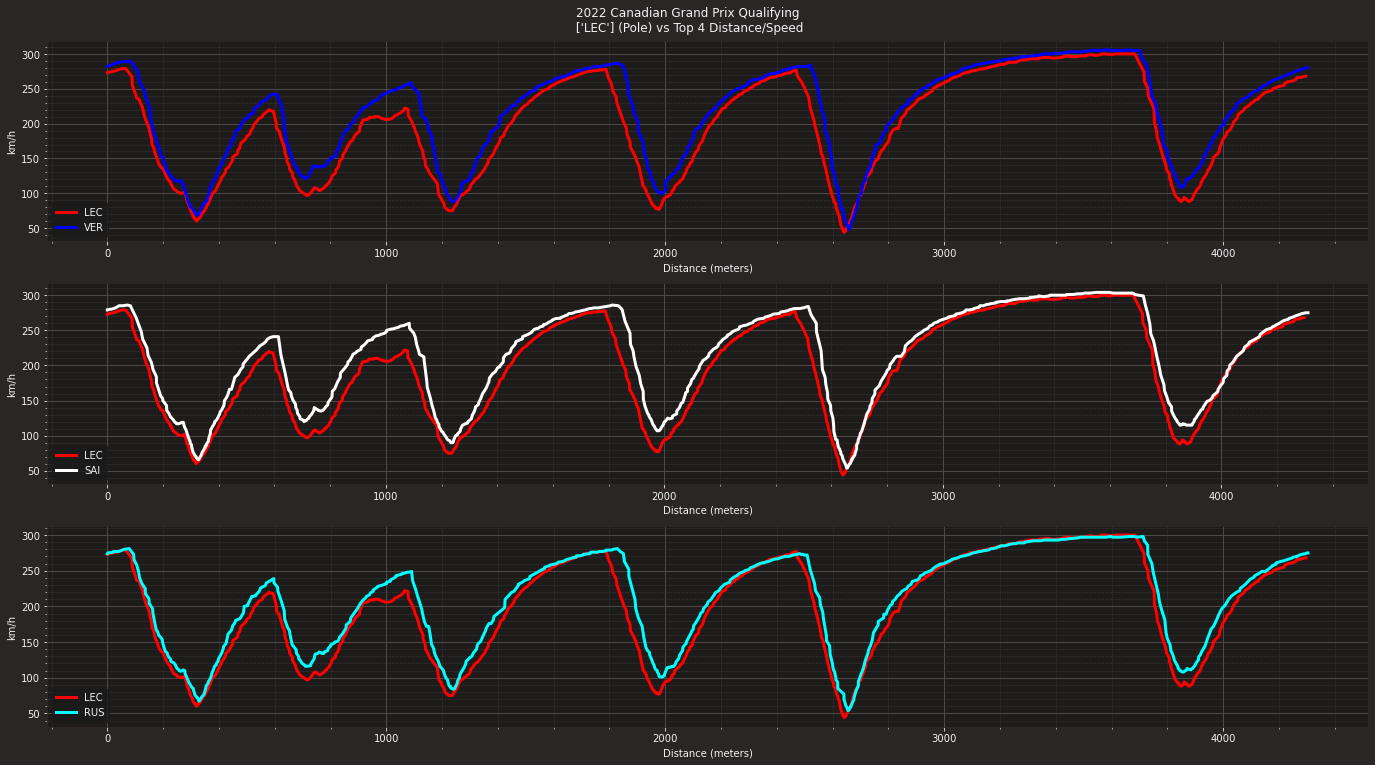

In [22]:
fig, ax = plt.subplots(3, tight_layout=True)
fig.suptitle(f"{year} {circuit} Qualifying\n {flec['Driver'].unique()} (Pole) vs Top 4 Distance/Speed")
# plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.gcf().set_size_inches(19.2,10.8)
ax[0].plot(flec['Distance'], flec['Speed'], label='LEC',color='red', lw=3)
ax[0].plot(fver['Distance'], fver['Speed'], label='VER',color='blue', lw=3)
ax[0].set(ylabel='km/h', xlabel='Distance (meters)')
ax[0].legend(loc="lower left")

ax[1].plot(flec['Distance'], flec['Speed'], label='LEC',color='red',lw=3)
ax[1].plot(fsai['Distance'], fsai['Speed'], label='SAI',color='white',lw=3)
ax[1].set(ylabel='km/h', xlabel='Distance (meters)')
ax[1].legend(loc="lower left")

ax[2].plot(flec['Distance'], flec['Speed'], label='LEC',color='red',lw=3)
ax[2].plot(frus['Distance'], frus['Speed'], label='RUS',color='cyan',lw=3)
ax[2].set(ylabel='km/h', xlabel='Distance (meters)')
ax[2].legend(loc="lower left")

plt.savefig(f"{year} {circuit} Qualifying Distance-Speed.jpeg",dpi=100)
plt.show()

## Laptime / Speed Comparison (Distance / Speed does the same thing so this will be left commented)

In [23]:
# fig, ax = plt.subplots(2,tight_layout=True)
# fig.suptitle(f"{year} {circuit} Qualifying\n {flec['Driver']} (Pole) vs Top 4 Laptime/Speed Comparison")
# # plt.subplots_adjust(wspace=0.4,hspace=0.4)
# plt.gcf().set_size_inches(19.2,10.8)
# # ax[0].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# # ax[0].plot(fver['Time'], fver['Speed'], label='VER', color='blue')
# # ax[0].set(ylabel='km/h', xlabel='Laptime (seconds)')
# # ax[0].legend(loc="lower left")

# ax[0].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# ax[0].plot(fsai['Time'], fsai['Speed'], label='SAI', color='green')
# ax[0].set(ylabel='km/h', xlabel='Laptime (seconds)')
# ax[0].legend(loc="lower left")

# ax[1].plot(flec['Time'], flec['Speed'], label='LEC', color='red')
# ax[1].plot(fper['Time'], fper['Speed'], label='PER', color='white')
# ax[1].set(ylabel='km/h', xlabel='Laptime (seconds)')
# ax[1].legend(loc="lower left")

# plt.savefig(f"{year} {circuit} Qualifying Laptime-Speed Comparison.jpeg",dpi=100)
# plt.show()

### Comparing Teammates Qualifying

In [24]:
#Creating lap dataframes and sorting them by LapTime.

zhou=pd.DataFrame(quali.laps.pick_driver('ZHO').pick_fastest()).T
bot=pd.DataFrame(quali.laps.pick_driver('BOT').pick_fastest()).T
merge1=pd.merge(zhou,bot,how='outer')
fl1 = Laps(merge1).sort_values(by='LapTime').reset_index(drop=True)
fl1.dropna(axis=1)

schu=pd.DataFrame(quali.laps.pick_driver('MSC').pick_fastest()).T
magn=pd.DataFrame(quali.laps.pick_driver('MAG').pick_fastest()).T
merge2=pd.merge(schu,magn,how='outer')
fl2=Laps(merge2).sort_values(by='LapTime').reset_index(drop=True)
fl2.dropna(axis=1)

ricc=pd.DataFrame(quali.laps.pick_driver('RIC').pick_fastest()).T
norr=pd.DataFrame(quali.laps.pick_driver('NOR').pick_fastest()).T
merge3=pd.merge(ricc,norr,how='outer')
fl3=Laps(merge3).sort_values(by='LapTime').reset_index(drop=True)
fl3.dropna(axis=1)

vers=pd.DataFrame(quali.laps.pick_driver('VER').pick_fastest()).T
pere=pd.DataFrame(quali.laps.pick_driver('PER').pick_fastest()).T
merge4=pd.merge(vers,pere,how='outer')
fl4 = Laps(merge4).sort_values(by='LapTime').reset_index(drop=True)
fl4.dropna(axis=1)

lecl=pd.DataFrame(quali.laps.pick_driver('LEC').pick_fastest()).T
sain=pd.DataFrame(quali.laps.pick_driver('SAI').pick_fastest()).T
merge5=pd.merge(lecl,sain,how='outer')
fl5=Laps(merge5).sort_values(by='LapTime').reset_index(drop=True)
fl5.dropna(axis=1)

vett=pd.DataFrame(quali.laps.pick_driver('VET').pick_fastest()).T
stro=pd.DataFrame(quali.laps.pick_driver('STR').pick_fastest()).T
merge6=pd.merge(vett,stro,how='outer')
fl6=Laps(merge6).sort_values(by='LapTime').reset_index(drop=True)
fl6.dropna(axis=1)

russ=pd.DataFrame(quali.laps.pick_driver('RUS').pick_fastest()).T
hami=pd.DataFrame(quali.laps.pick_driver('HAM').pick_fastest()).T
merge7=pd.merge(russ,hami,how='outer')
fl7=Laps(merge7).sort_values(by='LapTime').reset_index(drop=True)
fl7.dropna(axis=1)

gasl=pd.DataFrame(quali.laps.pick_driver('GAS').pick_fastest()).T
tsun=pd.DataFrame(quali.laps.pick_driver('TSU').pick_fastest()).T
merge8=pd.merge(gasl,tsun,how='outer')
fl8=Laps(merge8).sort_values(by='LapTime').reset_index(drop=True)
fl8.dropna(axis=1)
# print(fl8)

alon=pd.DataFrame(quali.laps.pick_driver('ALO').pick_fastest()).T
ocon=pd.DataFrame(quali.laps.pick_driver('OCO').pick_fastest()).T
merge9=pd.merge(alon,ocon,how='outer')
fl9=Laps(merge9).sort_values(by='LapTime').reset_index(drop=True)
fl9.dropna(axis=1)

albo=pd.DataFrame(quali.laps.pick_driver('ALB').pick_fastest()).T
lati=pd.DataFrame(quali.laps.pick_driver('LAT').pick_fastest()).T
merge10=pd.merge(albo,lati,how='outer')
fl10=Laps(merge10).sort_values(by='LapTime').reset_index(drop=True)
fl10.dropna(axis=1)

,Time,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
0,0 days 01:07:42.314000,23,0 days 00:01:26.858000,20.0,3.0,0 days 00:00:25.449000,0 days 00:00:28.015000,0 days 00:00:33.394000,0 days 01:06:40.905000,0 days 01:07:08.920000,0 days 01:07:42.314000,211.0,279.0,278.0,309.0,True,INTERMEDIATE,True,0 days 01:06:15.456000,Williams,ALB,1,True
1,0 days 00:33:38.452000,6,0 days 00:01:35.660000,10.0,1.0,0 days 00:00:28.092000,0 days 00:00:31.003000,0 days 00:00:36.565000,0 days 00:32:30.884000,0 days 00:33:01.887000,0 days 00:33:38.452000,184.0,270.0,264.0,306.0,True,WET,True,0 days 00:32:02.792000,Williams,LAT,2,True


In [25]:
best1=fl1.pick_fastest()
fl1['LapTimeDiff']=fl1['LapTime']-best1['LapTime']
# print(fl1[['Driver', 'LapTime', 'LapTimeDiff']])

best2=fl2.pick_fastest()
fl2['LapTimeDiff']=fl2['LapTime']-best2['LapTime']
# print(fl2[['Driver', 'LapTime', 'LapTimeDiff']])

best3=fl3.pick_fastest()
fl3['LapTimeDiff']=fl3['LapTime']-best3['LapTime']
# print(fl3[['Driver', 'LapTime', 'LapTimeDiff']])

best4=fl4.pick_fastest()
fl4['LapTimeDiff']=fl4['LapTime']-best4['LapTime']
# print(fl4[['Driver', 'LapTime', 'LapTimeDiff']])

best5=fl5.pick_fastest()
fl5['LapTimeDiff']=fl5['LapTime']-best5['LapTime']
# print(fl5[['Driver', 'LapTime', 'LapTimeDiff']])

best6=fl6.pick_fastest()
fl6['LapTimeDiff']=fl6['LapTime']-best6['LapTime']
print(fl6[['Driver', 'LapTime', 'LapTimeDiff']])

best7=fl7.pick_fastest()
fl7['LapTimeDiff']=fl7['LapTime']-best7['LapTime']
# print(fl7[['Driver', 'LapTime', 'LapTimeDiff']])

best8=fl8.pick_fastest()
fl8['LapTimeDiff']=fl8['LapTime']-best8['LapTime']
# print(fl8[['Driver', 'LapTime', 'LapTimeDiff']])

best9=fl9.pick_fastest()
fl9['LapTimeDiff']=fl9['LapTime']-best9['LapTime']
# print(fl9[['Driver', 'LapTime', 'LapTimeDiff']])

best10=fl10.pick_fastest()
fl10['LapTimeDiff']=fl10['LapTime']-best10['LapTime']
# print(fl10[['Driver', 'LapTime', 'LapTimeDiff']])

# tcol1 = list()
# for index, lap in fl1.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol1.append(color)

# tcol2 = list()
# for index, lap in fl2.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol2.append(color)
    
# tcol3 = list()
# for index, lap in fl3.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol3.append(color)

# tcol4 = list()
# for index, lap in fl4.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol4.append(color)

# tcol5 = list()
# for index, lap in fl5.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol5.append(color)

# # tcol6 = list()
# # for index, lap in fl6.iterlaps():
# #     color = ff1.plotting.team_color(lap['Team'])
# #     tcol6.append(color)

# tcol7 = list()
# for index, lap in fl7.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol7.append(color)
    
# tcol8 = list()
# for index, lap in fl8.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol8.append(color)

# tcol9 = list()
# for index, lap in fl9.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol9.append(color)

# tcol10 = list()
# for index, lap in fl10.iterlaps():
#     color = ff1.plotting.team_color(lap['Team'])
#     tcol10.append(color)
    

dcol1 = list()
for index, lap in fl1.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol1.append(color)

dcol2 = list()
for index, lap in fl2.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol2.append(color)
    
dcol3 = list()
for index, lap in fl3.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol3.append(color)
    
dcol4 = list()
for index, lap in fl4.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol4.append(color)

dcol5 = list()
for index, lap in fl5.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol5.append(color)

dcol6 = list()
for index, lap in fl6.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol6.append(color)

dcol7 = list()
for index, lap in fl7.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol7.append(color)

dcol8 = list()
for index, lap in fl8.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol8.append(color)

dcol9 = list()
for index, lap in fl9.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol9.append(color)

dcol10 = list()
for index, lap in fl10.iterlaps():
    color = ff1.plotting.driver_color(lap['Driver'])
    dcol10.append(color)

  Driver                LapTime            LapTimeDiff
0    VET 0 days 00:01:34.512000        0 days 00:00:00
1    STR 0 days 00:01:35.532000 0 days 00:00:01.020000


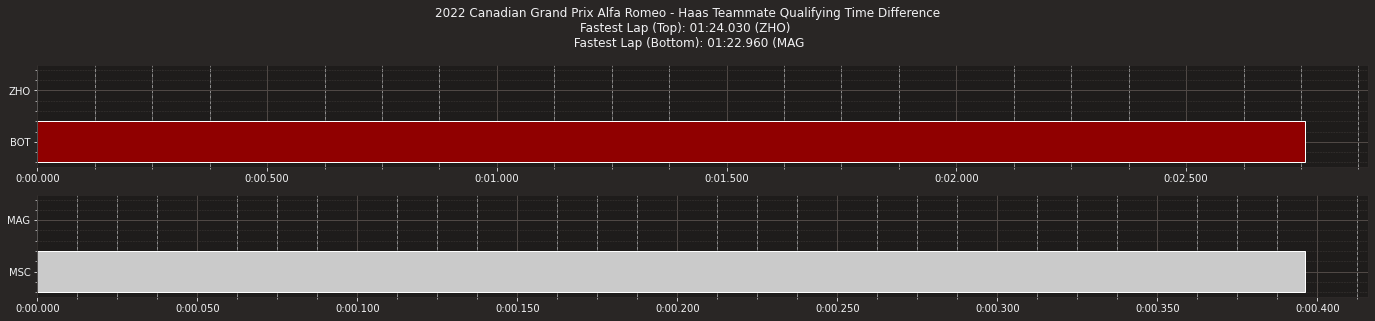

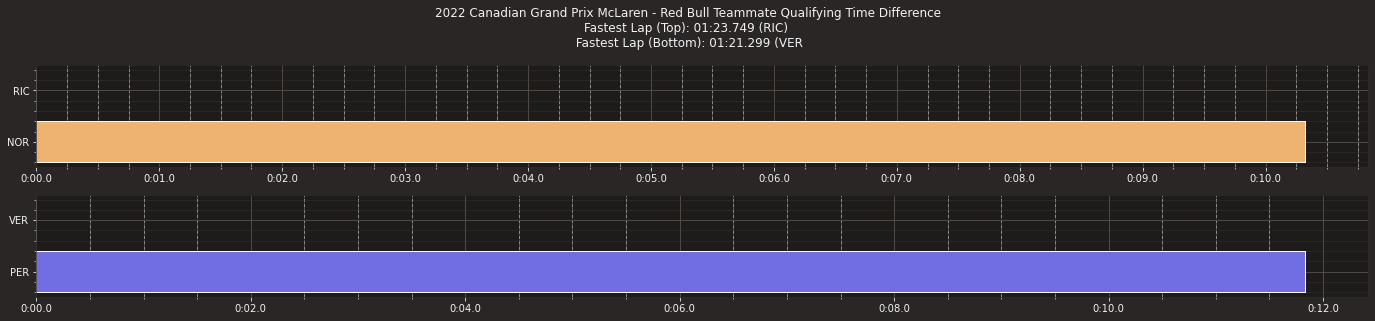

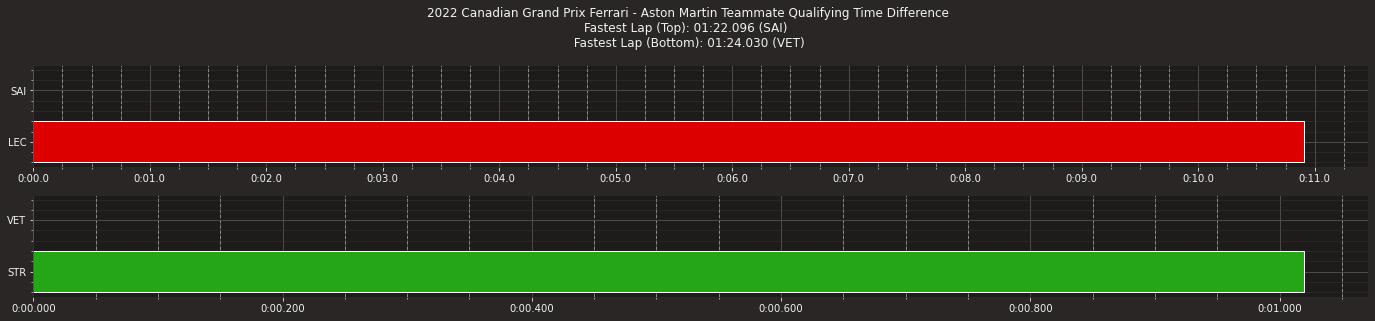

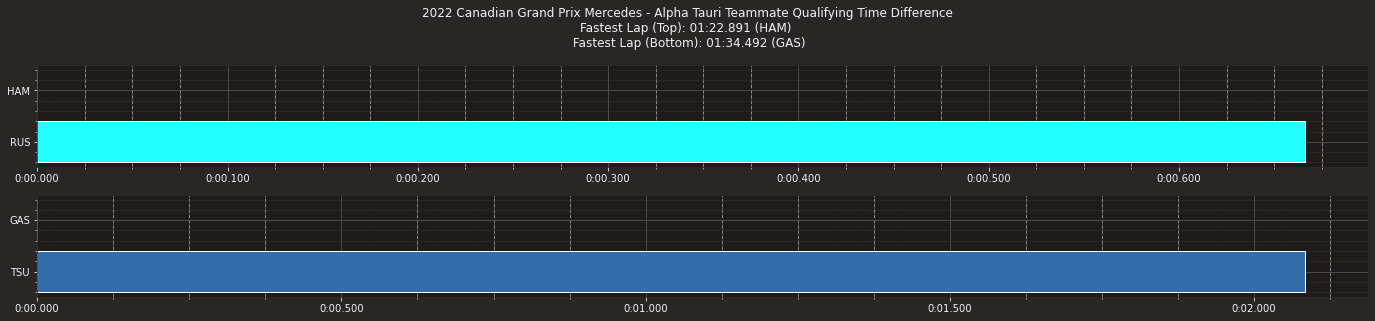

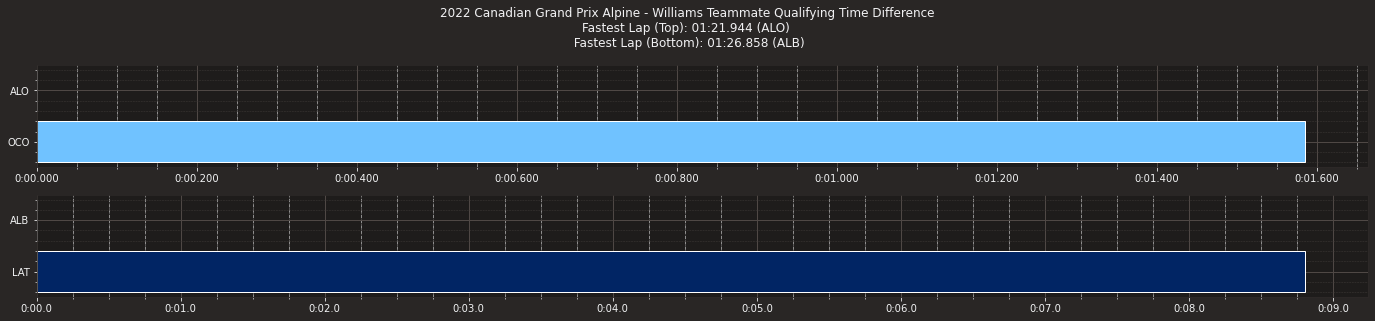

In [26]:
fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl1.index, fl1['LapTimeDiff'],color=dcol1, edgecolor='white')
ax[0].set_yticks(fl1.index)
ax[0].set_yticklabels(fl1['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr1 = strftimedelta(best1['LapTime'], '%m:%s.%ms')
ax[1].barh(fl2.index, fl2['LapTimeDiff'],color=dcol2, edgecolor='white')
ax[1].set_yticks(fl2.index)
ax[1].set_yticklabels(fl2['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr2 = strftimedelta(best2['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Alfa Romeo - Haas Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr1} ({best1['Driver']}) \n Fastest Lap (Bottom): {lapstr2} ({best2['Driver']}")
plt.savefig(f"{year} {circuit} Alfa Romeo - Haas Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl3.index, fl3['LapTimeDiff'],color=dcol3, edgecolor='white')
ax[0].set_yticks(fl3.index)
ax[0].set_yticklabels(fl3['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr3 = strftimedelta(best3['LapTime'], '%m:%s.%ms')
ax[1].barh(fl4.index, fl4['LapTimeDiff'],color=dcol4, edgecolor='white')
ax[1].set_yticks(fl4.index)
ax[1].set_yticklabels(fl4['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr4 = strftimedelta(best4['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} McLaren - Red Bull Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr3} ({best3['Driver']}) \n Fastest Lap (Bottom): {lapstr4} ({best4['Driver']}")
plt.savefig(f"{year} {circuit} McLaren - Red Bull Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl5.index, fl5['LapTimeDiff'],color=dcol5, edgecolor='white')
ax[0].set_yticks(fl5.index)
ax[0].set_yticklabels(fl5['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr5 = strftimedelta(best5['LapTime'], '%m:%s.%ms')
ax[1].barh(fl6.index, fl6['LapTimeDiff'],color=dcol6, edgecolor='white')
ax[1].set_yticks(fl6.index)
ax[1].set_yticklabels(fl6['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr6 = strftimedelta(best1['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Ferrari - Aston Martin Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr5} ({best5['Driver']}) \n Fastest Lap (Bottom): {lapstr6} ({best6['Driver']})")
plt.savefig(f"{year} {circuit} Ferrari - Aston Martin Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl7.index, fl7['LapTimeDiff'],color=dcol7, edgecolor='white')
ax[0].set_yticks(fl7.index)
ax[0].set_yticklabels(fl7['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr7 = strftimedelta(best7['LapTime'], '%m:%s.%ms')
ax[1].barh(fl8.index, fl8['LapTimeDiff'],color=dcol8, edgecolor='white')
ax[1].set_yticks(fl8.index)
ax[1].set_yticklabels(fl8['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr8 = strftimedelta(best8['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{year} {circuit} Mercedes - Alpha Tauri Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr7} ({best7['Driver']}) \n Fastest Lap (Bottom): {lapstr8} ({best8['Driver']})")
plt.savefig(f"{year} {circuit} Mercedes - Alpha Tauri Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(19.2,4.5)
ax[0].barh(fl9.index, fl9['LapTimeDiff'],color=dcol9, edgecolor='white')
ax[0].set_yticks(fl9.index)
ax[0].set_yticklabels(fl9['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr9 = strftimedelta(best9['LapTime'], '%m:%s.%ms')
ax[1].barh(fl10.index, fl10['LapTimeDiff'],color=dcol10, edgecolor='white')
ax[1].set_yticks(fl10.index)
ax[1].set_yticklabels(fl10['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
lapstr10 = strftimedelta(best10['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{year} {circuit} Alpine - Williams Teammate Qualifying Time Difference\n"
             f"Fastest Lap (Top): {lapstr9} ({best9['Driver']}) \n Fastest Lap (Bottom): {lapstr10} ({best10['Driver']})")
plt.savefig(f"{year} {circuit} Alpine - Williams Qualifying Teammate Time Difference.jpeg", dpi=100)
plt.show()

# Race Analysis

In [27]:
year=2022
circuit='Canadian Grand Prix'

race=ff1.get_session(year,circuit,'R')
lapsr=race.load_laps(with_telemetry=True)

C:\Users\EDGAR\anaconda3\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Canadian Grand Prix - Race [v2.2.7]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '44', '63', '16', '31', '77', '24', '14'

In [28]:
race.results[:4]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:36:21.757000,Finished,25.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,3.0,NaT,NaT,NaT,0 days 01:36:22.750000,Finished,19.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,3.0,4.0,NaT,NaT,NaT,0 days 01:36:28.763000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,8.0,NaT,NaT,NaT,0 days 01:36:34.070000,Finished,12.0


## Average Laptime Over a Stint

In [29]:
filt=((lapsr['Stint']==1) & (lapsr['Driver']=='PER') & (lapsr['LapTime']).notna())
filt2=((lapsr['Stint']==1) & (lapsr['Driver']=='VER') & (lapsr['LapTime']).notna())
medium_stints_per=lapsr.loc[filt,['Compound','Stint','Driver','LapTime']]
medium_stints_ver=lapsr.loc[filt2,['Compound','Stint','Driver','LapTime']]

In [30]:
# medium_stints_per,medium_stints_ver

In [31]:
ave=sum(medium_stints_per['LapTime'],datetime.timedelta())/ len(medium_stints_per['LapTime'])
ave2=sum(medium_stints_ver['LapTime'],datetime.timedelta())/ len(medium_stints_ver['LapTime'])
avediff=ave-ave2
print(f"{medium_stints_per['Driver'].unique()} average lap in Stint 1: {ave}. {medium_stints_ver['Driver'].unique()} average lap in Stint 1: {ave2}. Difference between the two average laps: {avediff} \n"
f"{medium_stints_per['Driver'].unique()} and {medium_stints_ver['Driver'].unique()} tyres in Stint 1: {medium_stints_per['Compound'].unique()}, {medium_stints_ver['Compound'].unique()}. ")

['PER'] average lap in Stint 1: 0 days 00:01:19.725333333. ['VER'] average lap in Stint 1: 0 days 00:01:22.645750. Difference between the two average laps: -1 days +23:59:57.079583333 
['PER'] and ['VER'] tyres in Stint 1: ['HARD'], ['MEDIUM']. 


## Fastest Speed on Each Race Tyre

In [33]:
meds=lapsr.loc[(lapsr['Compound']=='MEDIUM'),['Driver','Stint','LapTime','LapNumber','SpeedST','Compound','TyreLife']]
filt3=(meds['SpeedST']==max(meds['SpeedST']))
fmeds=pd.DataFrame(meds.loc[filt3,:])

# softs=lapsr.loc[(lapsr['Compound']=='SOFT'),['Driver','Stint','LapTime','LapNumber','SpeedST','Compound','TyreLife']]
# filt4=(softs['SpeedST']==max(softs['SpeedST']))
# fsoft=pd.DataFrame(softs.loc[filt4,:])

hards=lapsr.loc[(lapsr['Compound']=='HARD'),['Driver','Stint','LapTime','LapNumber','SpeedST','Compound','TyreLife']]
filt5=(hards['SpeedST']==max(hards['SpeedST']))
fhard=pd.DataFrame(hards.loc[filt5,:])

#Commenting out inters because they were not used in this race.
# inters=lapsr.loc[(lapsr['Compound']=='INTERMEDIATE'),['Driver','Stint','LapTime','LapNumber','SpeedST']]
# filt6=(inters['SpeedST']==max(inters['SpeedST']))
# fint=pd.DataFrame(inters.loc[filt6,:])
# fint
fhard,fmeds
# Magnussen with 328kmh on 32 lap old Hards
# Hamilton with 333kmh on 8 lap old Mediums
# Schumacher with 333kmh on 7 lap old Softs.

(    Driver  Stint                LapTime  LapNumber  SpeedST Compound  \
 282    LEC      1 0 days 00:01:20.117000          3    342.0     HARD   
 292    LEC      1 0 days 00:01:19.277000         13    342.0     HARD   
 
      TyreLife  
 282       3.0  
 292      13.0  ,
     Driver  Stint                LapTime  LapNumber  SpeedST Compound  \
 325    LEC      2 0 days 00:01:18.006000         46    342.0   MEDIUM   
 
      TyreLife  
 325       5.0  )

## Fastest Tyre Over a Stint

In [34]:
#How many stints were there?
print(f"There were {lapsr['Stint'].max()} stints in the {year} {circuit}.")

There were 3 stints in the 2022 Canadian Grand Prix.


In [35]:
#Average Stint 1 LapTime:
#Overall:
f1=((lapsr['Stint']==1)& (lapsr['LapTime'].notna()))
s1=lapsr.loc[f1,['LapTime','Compound','Stint','Driver','Team']]   
s1['Avg_Stint_LapTime']=sum(s1['LapTime'],datetime.timedelta())/ len(s1['LapTime'])
s1_avg_time=s1['Avg_Stint_LapTime'].to_list()

#Tyres used in Stint 1:
s1=s1.sort_values('LapTime')
s1tyres=lapsr.loc[lapsr['Stint']==1,['Compound','Driver']]
print(f"The tyres used in Stint 1 were:{s1tyres['Compound'].unique()}. However there seems to be an error in the data - I cannot access laptimes for Medium runners.")
print(f"The average laptime for the first stint of the {year} {circuit} was {s1_avg_time[0]}.")
#For Soft tyres:
f1soft=((lapsr['Stint']==1)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='SOFT'))
s1soft=pd.DataFrame(lapsr.loc[f1soft,['LapTime','Compound','Stint','Driver','Team']])
s1soft['Avg_Stint_LapTime']=sum(s1soft['LapTime'],datetime.timedelta())/ len(s1soft['LapTime'])
#For Medium tyres:
# f1medium=((lapsr['Stint']==1)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='MEDIUM'))
# s1medium=pd.DataFrame(lapsr.loc[f1medium,['LapTime','Compound','Stint','Driver','Team']])
# s1medium['Avg_Stint_LapTime']=sum(s1medium['LapTime'],datetime.timedelta())/ len(s1medium['LapTime'])
#Stint 1 Average LapTime Difference:
#Softs to Mediums
s1sof=s1soft['Avg_Stint_LapTime'].to_list()
# s1med=s1medium['Avg_Stint_LapTime'].to_list()
# s1sofmedtime_diff=s1sof[0]-s1med[0]
print(f"The average laptime for {s1soft['Compound'].unique()} in Stint {s1['Stint'].unique()} of the {year} {circuit} was {s1sof[0]}.")
# print(f"The average laptime for {s1medium['Compound'].unique()} in Stint {s1['Stint'].unique()} of the {year} {circuit} was {s1med[0]}.")
# print(f"The average laptime difference between Softs and Mediums in Stint {s1['Stint'].unique()} of the {year} {circuit} was: {s1sofmedtime_diff} seconds.")

The tyres used in Stint 1 were:['MEDIUM' 'HARD']. However there seems to be an error in the data - I cannot access laptimes for Medium runners.
The average laptime for the first stint of the 2022 Canadian Grand Prix was 0 days 00:01:22.789269662.


ZeroDivisionError: integer division or modulo by zero

In [ ]:
#Average Stint 2 LapTimes:
#Overall:
f22=((lapsr['Stint']==2)& (lapsr['LapTime'].notna()))
s2=lapsr.loc[f22,['LapTime','Compound','Stint','Driver','Team']]   
s2['Avg_Stint_LapTime']=sum(s2['LapTime'],datetime.timedelta())/ len(s2['LapTime'])
s2_avg_time=s2['Avg_Stint_LapTime'].to_list()
print(f"The average laptime for Stint {s2['Stint'].unique()} of the {year} {circuit} was {s2_avg_time[0]}.")

#Tyres used in Stint 2:
s2tyres=lapsr.loc[lapsr['Stint']==2,['Compound']]
print(f"The tyres used in Stint 2 were:{s2tyres['Compound'].unique()}.")

#For Soft tyres:
f2soft=((lapsr['Stint']==2)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='SOFT'))
s2soft=pd.DataFrame(lapsr.loc[f2soft,['LapTime','Compound','Stint','Driver','Team']])
s2soft['Avg_Stint_LapTime']=sum(s2soft['LapTime'],datetime.timedelta())/ len(s2soft['LapTime'])

#For Medium tyres:
f2medium=((lapsr['Stint']==2)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='MEDIUM'))
s2medium=pd.DataFrame(lapsr.loc[f2medium,['LapTime','Compound','Stint','Driver','Team']])
s2medium['Avg_Stint_LapTime']=sum(s2medium['LapTime'],datetime.timedelta())/ len(s2medium['LapTime'])

#For Hard tyres:
# f2hard=((lapsr['Stint']==2)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='HARD'))
# s2hard=pd.DataFrame(lapsr.loc[f2hard,['LapTime','Compound','Stint','Driver','Team']])
# s2hard['Avg_Stint_LapTime']=sum(s2hard['LapTime'],datetime.timedelta())/ len(s2hard['LapTime'])
# print(f"The average laptime for {s2hard['Compound'].unique()} Stint {s2['Stint'].unique()} of the {year} {circuit} was {s2hard.iloc[0,[-1]]}.")

#Drivers that pitted at least once: 
f2=(lapsr['Stint']==2)&((lapsr['Compound']=='SOFT') | (lapsr['Compound']=='MEDIUM') | (lapsr['Compound']=='HARD'))
s2=lapsr.loc[f2,['Driver','LapTime','Compound','SpeedST','TyreLife','Stint']].sort_values('LapTime')
print(f"These were the drivers that switched tyres at least 1 time: {s2['Driver'].unique()}.")

#Stint 2 Average LapTime Difference:
#Softs to Mediums
s2sof=s2soft['Avg_Stint_LapTime'].to_list()
s2med=s2medium['Avg_Stint_LapTime'].to_list()
s2sofmedtime_diff=s2sof[0]-s2med[0]
print(f"The average laptime for {s2soft['Compound'].unique()} in Stint {s2['Stint'].unique()} of the {year} {circuit} was {s2sof[0]}.")
print(f"The average laptime for {s2medium['Compound'].unique()} in Stint {s2['Stint'].unique()} of the {year} {circuit} was {s2med[0]}.")
print(f"The average laptime difference between Softs and Mediums in the second stint of the {year} {circuit} was: {s2sofmedtime_diff} seconds.")
# #Mediums to Hards
# s2har=s2hard['Avg_Stint_LapTime'].to_list()
# s2medhartime_diff=s2med[0]-s2har[0]
# print(f"The average laptime difference between Mediums and Hards in the second stint of the {year} {circuit} was: {s2medhartime_diff} seconds.\n Average laptime on Mediums was {s2med[0]} \n Average laptime on Hards was {s2har[0]}.")
# #Softs to Hards
# s2sofhartime_diff=s2sof[0]-s2har[0]
# print(f"The average laptime difference between Softs and Hards in the second stint of the {year} {circuit} was: {s2sofhartime_diff} seconds.\n Average laptime on Softs was {s2sof[0]} \n Average laptime on Hards was {s2har[0]}.")


In [ ]:
#Average Stint 3 LapTimes:
#Overall
f33=((lapsr['Stint']==3)& (lapsr['LapTime'].notna()))
s3=lapsr.loc[f33,['Driver','LapTime','Compound','SpeedST','TyreLife','Stint']].sort_values('LapTime')
s3['Avg_Stint_LapTime']=sum(s3['LapTime'],datetime.timedelta())/ len(s3['LapTime'])
s3_avg_time=s3['Avg_Stint_LapTime'].to_list()
print(f"The average laptime for Stint {s3['Stint'].unique()} of the {year} {circuit} was {s3_avg_time[0]}.")

#Tyres used in Stint 3:
s3tyres=lapsr.loc[lapsr['Stint']==3,['Compound']]
print(f"The tyres used in Stint 3 were:{s3tyres['Compound'].unique()}.")

f3medium=((lapsr['Stint']==3)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='MEDIUM'))
s3medium=pd.DataFrame(lapsr.loc[f3medium,['LapTime','Compound','Stint','Driver','Team']])
s3medium['Avg_Stint_LapTime']=sum(s3medium['LapTime'],datetime.timedelta())/ len(s3medium['LapTime'])

f3soft=((lapsr['Stint']==3)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='SOFT'))
s3soft=pd.DataFrame(lapsr.loc[f3soft,['LapTime','Compound','Stint','Driver','Team']])
s3soft['Avg_Stint_LapTime']=sum(s3soft['LapTime'],datetime.timedelta())/ len(s3soft['LapTime'])

f3hard=((lapsr['Stint']==3)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='HARD'))
s3hard=pd.DataFrame(lapsr.loc[f3hard,['LapTime','Compound','Stint','Driver','Team']])
s3hard['Avg_Stint_LapTime']=sum(s3hard['LapTime'],datetime.timedelta())/ len(s3hard['LapTime'])

#Drivers that pitted twice:
f3=(lapsr['Stint']<=3)&((lapsr['Compound']=='SOFT')| (lapsr['Compound']=='MEDIUM') | (lapsr['Compound']=='HARD'))
s3=lapsr.loc[f3,['Driver','LapTime','Compound','SpeedST','TyreLife','Stint']].sort_values('LapTime')
print(f"These were the drivers on that switched tyres 2 times: {s3['Driver'].unique()}.")

#Stint 3 Average LapTime Difference:
#Softs to Mediums
s3med=s3medium['Avg_Stint_LapTime'].to_list()
s3sof=s3soft['Avg_Stint_LapTime'].to_list()
s3sofmedtime_diff=s3sof[0]-s3med[0]
print(f"The average laptime difference between {s3soft['Compound'].unique()} and {s3medium['Compound'].unique()} in the third stint of the {year} {circuit} was: {s3sofmedtime_diff} seconds.\n Average laptime on {s3soft['Compound'].unique()} was {s3sof[0]} \n Average laptime on {s3medium['Compound'].unique()} was {s3med[0]}.")
#Mediums to Hards
s3med=s3medium['Avg_Stint_LapTime'].to_list()
s3har=s3hard['Avg_Stint_LapTime'].to_list()
s3medhartime_diff=s3har[0]-s3med[0]
print(f"The average laptime difference between {s3hard['Compound'].unique()} and {s3medium['Compound'].unique()} in the third stint of the {year} {circuit} was: {s3medhartime_diff} seconds.\n Average laptime on {s3hard['Compound'].unique()} was {s3har[0]} \n Average laptime on {s3medium['Compound'].unique()} was {s3med[0]}.")
#Softs to Hards
s3sofhartime_diff=s3har[0]-s3sof[0]
print(f"The average laptime difference between {s3soft['Compound'].unique()} and {s3hard['Compound'].unique()} in the third stint of the {year} {circuit} was: {s3sofhartime_diff} seconds.\n Average laptime on {s3soft['Compound'].unique()} was {s3sof[0]} \n Average laptime on {s3hard['Compound'].unique()} was {s3har[0]}.")


In [ ]:
#Average Stint 4 LapTimes:
#Overall
f44=((lapsr['Stint']==4)& (lapsr['LapTime'].notna()))
s4=lapsr.loc[f44,['Driver','LapTime','Compound','SpeedST','TyreLife','Stint']].sort_values('LapTime')
s4['Avg_Stint_LapTime']=sum(s4['LapTime'],datetime.timedelta())/ len(s4['LapTime'])
s4_avg_time=s4['Avg_Stint_LapTime'].to_list()
print(f"The average laptime for Stint {s4['Stint'].unique()} of the {year} {circuit} was {s4_avg_time[0]}.")

#Tyres used in Stint 4:
s4tyres=lapsr.loc[lapsr['Stint']==4,['Compound']]
print(f"The tyres used in Stint 4 were:{s4tyres['Compound'].unique()}.")

f4medium=((lapsr['Stint']==4)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='MEDIUM'))
s4medium=pd.DataFrame(lapsr.loc[f4medium,['LapTime','Compound','Stint','Driver','Team']])
s4medium['Avg_Stint_LapTime']=sum(s4medium['LapTime'],datetime.timedelta())/ len(s4medium['LapTime'])

f4soft=((lapsr['Stint']==4)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='SOFT'))
s4soft=pd.DataFrame(lapsr.loc[f4soft,['LapTime','Compound','Stint','Driver','Team']])
s4soft['Avg_Stint_LapTime']=sum(s4soft['LapTime'],datetime.timedelta())/ len(s4soft['LapTime'])

# f4hard=((lapsr['Stint']==4)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='HARD'))
# s4hard=pd.DataFrame(lapsr.loc[f4hard,['LapTime','Compound','Stint','Driver','Team']])
# s4hard['Avg_Stint_LapTime']=sum(s4hard['LapTime'],datetime.timedelta())/ len(s4hard['LapTime'])

#Drivers that pitted 3 times:
f4=(lapsr['Stint']==4)&((lapsr['Compound']=='SOFT')| (lapsr['Compound']=='MEDIUM') | (lapsr['Compound']=='HARD'))
s4=lapsr.loc[f4,['Driver','LapTime','Compound','SpeedST','TyreLife','Stint']].sort_values('LapTime')
print(f"These were the drivers on that switched tyres 3 times: {s4['Driver'].unique()}.")

#Stint 4 Average LapTime Difference:
#Softs to Mediums
s4med=s4medium['Avg_Stint_LapTime'].to_list()
s4sof=s4soft['Avg_Stint_LapTime'].to_list()
s4sofmedtime_diff=s4med[0]-s4sof[0]
print(f"The average laptime difference between {s4soft['Compound'].unique()} and {s4medium['Compound'].unique()} in the third stint of the {year} {circuit} was: {s4sofmedtime_diff} seconds.\n Average laptime on {s4soft['Compound'].unique()} was {s4sof[0]} \n Average laptime on {s4medium['Compound'].unique()} was {s4med[0]}.")
# #Mediums to Hards
# s4med=s4medium['Avg_Stint_LapTime'].to_list()
# s4har=s4hard['Avg_Stint_LapTime'].to_list()
# s4medhartime_diff=s4har[0]-s4med[0]
# print(f"The average laptime difference between {s4hard['Compound'].unique()} and {s4medium['Compound'].unique()} in the third stint of the {year} {circuit} was: {s4medhartime_diff} seconds.\n Average laptime on {s4hard['Compound'].unique()} was {s4har[0]} \n Average laptime on {s4medium['Compound'].unique()} was {s4med[0]}.")
# #Softs to Hards
# s4sofhartime_diff=s4har[0]-s4sof[0]
# print(f"The average laptime difference between {s4soft['Compound'].unique()} and {s4hard['Compound'].unique()} in the third stint of the {year} {circuit} was: {s4sofhartime_diff} seconds.\n Average laptime on {s4soft['Compound'].unique()} was {s4sof[0]} \n Average laptime on {s4hard['Compound'].unique()} was {s4har[0]}.")


In [ ]:
#Average Stint 5 LapTimes:
#Overall
f55=((lapsr['Stint']==5)& (lapsr['LapTime'].notna()))
s5=lapsr.loc[f55,['Driver','LapTime','Compound','SpeedST','TyreLife','Stint']].sort_values('LapTime')
s5['Avg_Stint_LapTime']=sum(s5['LapTime'],datetime.timedelta())/ len(s5['LapTime'])
s5_avg_time=s5['Avg_Stint_LapTime'].to_list()
print(f"The average laptime for Stint {s5['Stint'].unique()} of the {year} {circuit} was {s5_avg_time[0]}.")

#Tyres used in Stint 5:
s5tyres=lapsr.loc[lapsr['Stint']==5,['Compound']]
print(f"The tyres used in Stint 5 were:{s5tyres['Compound'].unique()}.")

# f5medium=((lapsr['Stint']==5)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='MEDIUM'))
# s5medium=pd.DataFrame(lapsr.loc[f5medium,['LapTime','Compound','Stint','Driver','Team']])
# s5medium['Avg_Stint_LapTime']=sum(s5medium['LapTime'],datetime.timedelta())/ len(s5medium['LapTime'])

f5soft=((lapsr['Stint']==5)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='SOFT'))
s5soft=pd.DataFrame(lapsr.loc[f5soft,['LapTime','Compound','Stint','Driver','Team']])
s5soft['Avg_Stint_LapTime']=sum(s5soft['LapTime'],datetime.timedelta())/ len(s5soft['LapTime'])

# f5hard=((lapsr['Stint']==5)& (lapsr['LapTime'].notna()) & (lapsr['Compound']=='HARD'))
# s5hard=pd.DataFrame(lapsr.loc[f5hard,['LapTime','Compound','Stint','Driver','Team']])
# s5hard['Avg_Stint_LapTime']=sum(s5hard['LapTime'],datetime.timedelta())/ len(s5hard['LapTime'])

#Drivers that pitted 4 times:
f5=(lapsr['Stint']==5)&((lapsr['Compound']=='SOFT')| (lapsr['Compound']=='MEDIUM') | (lapsr['Compound']=='HARD'))
s5=lapsr.loc[f5,['Driver','LapTime','Compound','SpeedST','TyreLife','Stint']].sort_values('LapTime')
print(f"These were the drivers on that switched tyres 4 times: {s5['Driver'].unique()}.")

#Stint 5 Average LapTime Difference:
#Softs to Mediums
# s5med=s5medium['Avg_Stint_LapTime'].to_list()
# s5sof=s5soft['Avg_Stint_LapTime'].to_list()
# s5sofmedtime_diff=s5med[0]-s5sof[0]
# print(f"The average laptime difference between {s5soft['Compound'].unique()} and {s5medium['Compound'].unique()} in the third stint of the {year} {circuit} was: {s5sofmedtime_diff} seconds.\n Average laptime on {s5soft['Compound'].unique()} was {s5sof[0]} \n Average laptime on {s5medium['Compound'].unique()} was {s5med[0]}.")
# #Mediums to Hards
# s5med=s5medium['Avg_Stint_LapTime'].to_list()
# s5har=s5hard['Avg_Stint_LapTime'].to_list()
# s5medhartime_diff=s5har[0]-s5med[0]
# print(f"The average laptime difference between {s5hard['Compound'].unique()} and {s5medium['Compound'].unique()} in the third stint of the {year} {circuit} was: {s5medhartime_diff} seconds.\n Average laptime on {s5hard['Compound'].unique()} was {s5har[0]} \n Average laptime on {s5medium['Compound'].unique()} was {s5med[0]}.")
# #Softs to Hards
# s5sofhartime_diff=s5har[0]-s5sof[0]
# print(f"The average laptime difference between {s5soft['Compound'].unique()} and {s5hard['Compound'].unique()} in the third stint of the {year} {circuit} was: {s5sofhartime_diff} seconds.\n Average laptime on {s5soft['Compound'].unique()} was {s5sof[0]} \n Average laptime on {s5hard['Compound'].unique()} was {s5har[0]}.")


In [ ]:
race.results[:4]

### Fastest Minisectors in the race

In [ ]:
#Getting the laps from all 4 drivers
lrus=laps.pick_driver('RUS')
lver=laps.pick_driver('VER')
lsai=laps.pick_driver('SAI')
lper=laps.pick_driver('PER')
#Getting telemetry data from drivers
frus=lrus.pick_fastest().get_telemetry().add_distance()
fver=lver.pick_fastest().get_telemetry().add_distance()
fsai=lsai.pick_fastest().get_telemetry().add_distance()
fper=lper.pick_fastest().get_telemetry().add_distance()
#Creating Driver column
frus['Driver']='RUS'
fver['Driver']='VER'
fsai['Driver']='SAI'
fper['Driver']='PER'
#Getting everything in one dataframe
t1=frus.append(fver)
t2=t1.append(fsai)
telemetry=t2.append(fper)

In [ ]:
#Creating the minisectors (doing 30 - 10 per sector)
nmini=30
#Grabbing circuit distance
cdist=max(telemetry['Distance'])
#Dividing circuit distance by number of minisectors to have our minisector distance
minilen=cdist/nmini
#Calculating distances at which the next minisector begins
minis=[0]
for b in range(0,(nmini-1)):
    minis.append(minilen*(b+1))
#Assigning every row in the dataset to a minisector, so we always know which minisector the cars were located in.
telemetry['Minisector']=telemetry['Distance'].apply(
    lambda dist:(
        int((dist // minilen)+1)))

In [ ]:
#Finding the fastest driver per minisector so we can color it in the minisector map
avgspeed=telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()
fastest = avgspeed.loc[avgspeed.groupby(['Minisector'])['Speed'].idxmax()]
fastest = fastest[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_Driver'})

In [ ]:
fastest['Fastest_Driver'].unique()
#4 drivers had a fastest minisector

In [ ]:
# Fastest driver per minisector + telemetry
telemetry = telemetry.merge(fastest, on=['Minisector'])

# Ordering by distance
telemetry = telemetry.sort_values(by=['Distance'])

# Converting driver name to integer
telemetry.loc[telemetry['Fastest_Driver'] == 'RUS', 'Fastest_Driver_int'] = 3
telemetry.loc[telemetry['Fastest_Driver'] == 'VER', 'Fastest_Driver_int'] = 1
telemetry.loc[telemetry['Fastest_Driver'] == 'PER', 'Fastest_Driver_int'] = 2
telemetry.loc[telemetry['Fastest_Driver'] == 'SAI', 'Fastest_Driver_int'] = 4

In [ ]:
# Finally, plotting.
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_Driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('Set2', 4)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(8)


plt.gca().add_collection(lc_comp)
plt.gcf().set_size_inches(19.2,10.8)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.title(f'{year} {circuit} Race Fastest Minisectors',color='white')
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,6))
cbar.set_ticks(np.arange(1.5, 6.5))
cbar.set_ticklabels(['VER Fastest', 'PER Fastest','RUS Fastest','SAI Fastest'])

plt.savefig(f"{year} {circuit} Race Fastest Minisectors.jpeg", dpi=100)

plt.show()

### Race Pace Comparison

In [ ]:
race.results[:5]

In [ ]:
ver = lapsr.pick_driver('VER')
sai = lapsr.pick_driver('SAI')
fig, ax = plt.subplots(tight_layout=True)
plt.gcf().set_size_inches(25.0,12.0)
plt.tick_params(axis='both', which='major', labelsize=15, grid_alpha=0.9, grid_ls='-',grid_lw=2)
plt.tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax.plot(sai['LapNumber'], sai['LapTime'], color='red',linewidth=3,ls='-',marker='o',markersize=4,markerfacecolor='0.70', markeredgecolor='red', markeredgewidth=5)
ax.plot(ver['LapNumber'], ver['LapTime'], color='dodgerblue',linewidth=3,ls='-',marker='o',markersize=4,markerfacecolor='0.70', markeredgecolor='dodgerblue', markeredgewidth=5)
ax.set_title(f"{year} {circuit} \n Verstappen vs. Sainz Race Pace", fontsize=15)
ax.set_xticks(range(0,75,5))
ax.set_xlabel("Lap Number",fontsize=15)
ax.set_ylabel("Lap Time",fontsize=15)
plt.savefig(f"{year} {circuit} Verstappen vs Sainz Race Pace Comparison.jpeg",dpi=100)
plt.show()

### Race Pace Comparison Between Teammates

In [ ]:
lecl=lapsr.pick_driver('LEC')
sain=lapsr.pick_driver('SAI')

ver=lapsr.pick_driver('VER')
per=lapsr.pick_driver('PER')

hami=lapsr.pick_driver('HAM')
russ=lapsr.pick_driver('RUS')

sain=lapsr.pick_driver('MAG')
lecl=lapsr.pick_driver('LEC')

bott=lapsr.pick_driver('BOT')
zhou=lapsr.pick_driver('ZHO')

norr=lapsr.pick_driver('NOR')
ricc=lapsr.pick_driver('RIC')

vett=lapsr.pick_driver('VET')
stro=lapsr.pick_driver('STR')

albo=lapsr.pick_driver('ALB')
lati=lapsr.pick_driver('LAT')

gasl=lapsr.pick_driver('GAS')
tsun=lapsr.pick_driver('TSU')

alon=lapsr.pick_driver('ALO')
ocon=lapsr.pick_driver('OCO')

schu=lapsr.pick_driver('MSC')
magn=lapsr.pick_driver('MAG')

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,75,5))
ax[0].plot(per['LapNumber'], per['LapTime'], label='PER', color='blue',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='blue', markeredgewidth=9)
ax[0].plot(ver['LapNumber'], ver['LapTime'], label='VER', color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].set_xticks(range(0,75,5))
ax[1].plot(lecl['LapNumber'], lecl['LapTime'], label='LEC',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].plot(sain['LapNumber'], sain['LapTime'], label='SAI',color='red',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='red', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
plt.suptitle(f"{year} {circuit} Ferrari RB Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Ferrari RB Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,75,5))
ax[0].plot(zhou['LapNumber'], zhou['LapTime'], label='ZHO',color='magenta',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='magenta', markeredgewidth=9)
ax[0].plot(bott['LapNumber'], bott['LapTime'], label='BOT',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,75,5))
ax[1].plot(norr['LapNumber'], norr['LapTime'], label='NOR',color='orange',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='orange', markeredgewidth=9)
ax[1].plot(ricc['LapNumber'], ricc['LapTime'], label='RIC',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Alfa Romeo McLaren Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Alfa Romeo McLaren Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,75,5))
ax[0].plot(vett['LapNumber'], vett['LapTime'], label='VET',color='green',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='green', markeredgewidth=9)
ax[0].plot(stro['LapNumber'], stro['LapTime'], label='STR',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,75,5))
ax[1].plot(albo['LapNumber'], albo['LapTime'], label='ALB',color='blue',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='blue', markeredgewidth=9)
ax[1].plot(lati['LapNumber'], lati['LapTime'], label='LAT',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Aston Martin Williams Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Aston Martin Williams Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,75,5))
ax[0].plot(gasl['LapNumber'], gasl['LapTime'], label='GAS',color='dodgerblue',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='dodgerblue', markeredgewidth=9)
ax[0].plot(tsun['LapNumber'], tsun['LapTime'], label='TSU',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,75,5))
ax[1].plot(alon['LapNumber'], alon['LapTime'], label='ALO',color='pink',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='pink', markeredgewidth=9)
ax[1].plot(ocon['LapNumber'], ocon['LapTime'], label='OCO',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Alpha Tauri Alpine Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Alpha Tauri Alpine Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

fig, ax = plt.subplots(2, tight_layout=True)
plt.gcf().set_size_inches(50,25)
ax[0].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[0].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[0].set_xticks(range(0,75,5))
ax[0].plot(hami['LapNumber'], hami['LapTime'], label='HAM',color='cyan',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='cyan', markeredgewidth=9)
ax[0].plot(russ['LapNumber'], russ['LapTime'], label='RUS',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[0].set_xlabel("Lap Number",fontsize=25)
ax[0].set_ylabel("Lap Time",fontsize=25)
ax[0].legend(loc="lower left",fontsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25, grid_alpha=0.9, grid_ls='-',grid_lw=2)
ax[1].tick_params(axis='x', which='minor',grid_alpha=0.8, grid_ls='-',grid_lw=0.2)
ax[1].set_xticks(range(0,75,5))
ax[1].plot(schu['LapNumber'], schu['LapTime'], label='MSC',color='white',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='white', markeredgewidth=9)
ax[1].plot(magn['LapNumber'], magn['LapTime'], label='MAG',color='grey',linewidth=6,ls='-',marker='o',markersize=7,markerfacecolor='0.60', markeredgecolor='grey', markeredgewidth=9)
ax[1].set_xlabel("Lap Number",fontsize=25)
ax[1].set_ylabel("Lap Time",fontsize=25)
ax[1].legend(loc="lower left",fontsize=25)
plt.suptitle(f"{year} {circuit} Mercedes Haas Teammate Race Pace Comparison",fontsize=25)
plt.savefig(f"{year} {circuit} Mercedes Haas Teammate Race Pace Comparison.jpeg",dpi=100)
plt.show()

### Race Finishing Time Difference Between Teammates

In [ ]:
#Getting total time on track of the drivers in seconds
lapsr['TimeSeconds']=lapsr['Time'].dt.total_seconds()
per=lapsr.pick_driver('PER')
per=per.loc[per['TimeSeconds'] == max(per['TimeSeconds'].dropna())]

ver=lapsr.pick_driver('VER')
ver=ver.loc[ver['TimeSeconds'] == max(ver['TimeSeconds'].dropna())]

merge1=pd.merge(per,ver,how='outer')
rf1 = Laps(merge1).sort_values(by='TimeSeconds').reset_index(drop=True)
# print(rf1.dropna(axis=1))

hami=lapsr.pick_driver('HAM')
hami=hami.loc[hami['TimeSeconds'] == max(hami['TimeSeconds'].dropna())]

russ=lapsr.pick_driver('RUS')
russ=russ.loc[russ['TimeSeconds'] == max(russ['TimeSeconds'].dropna())]

merge2=pd.merge(hami,russ,how='outer')
rf2=Laps(merge2).sort_values(by='TimeSeconds').reset_index(drop=True)
# print(rf2.dropna(axis=1))
schu=lapsr.pick_driver('MSC')
schu=schu.loc[schu['TimeSeconds'] == max(schu['TimeSeconds'].dropna(),default=0)]

magn=lapsr.pick_driver('MAG')
magn=magn.loc[magn['TimeSeconds'] == max(magn['TimeSeconds'].dropna())]

merge3=pd.merge(schu,magn,how='outer')
rf3=Laps(merge3).sort_values(by='TimeSeconds').reset_index(drop=True)
# print(rf3.dropna(axis=1))


In [36]:
b1=rf1.loc[rf1['TimeSeconds']==min(rf1['TimeSeconds'])]
best1=float(b1.TimeSeconds)
rf1['RaceTimeDiff']=rf1['TimeSeconds']-best1
# print(rf1[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

b2=rf2.loc[rf2['TimeSeconds']==min(rf2['TimeSeconds'])]
best2=float(b2.TimeSeconds)
rf2['RaceTimeDiff']=rf2['TimeSeconds']-best2
# print(rf2[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

b3=rf3.loc[rf3['TimeSeconds']==min(rf3['TimeSeconds'])]
best3=float(b3.TimeSeconds)
rf3['RaceTimeDiff']=rf3['TimeSeconds']-best3
# print(rf3[['Driver', 'TimeSeconds', 'RaceTimeDiff']])

NameError: name 'rf1' is not defined

In [ ]:
tcol1 = list()
for index, lap in rf1.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol1.append(color)

tcol2 = list()
for index, lap in rf2.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol2.append(color)
    
tcol3 = list()
for index, lap in rf3.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    tcol3.append(color)

In [ ]:
fig, ax = plt.subplots(3,tight_layout=True)

plt.gcf().set_size_inches(16.0,10.8)

ax[0].barh(rf1.index, rf1['RaceTimeDiff'],color=tcol1, edgecolor='white')
ax[0].set_yticks(rf1.index)
ax[0].set_yticklabels(rf1['Driver'])
ax[0].invert_yaxis()
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)

ax[1].barh(rf2.index, rf2['RaceTimeDiff'],color=tcol2, edgecolor='white')
ax[1].set_yticks(rf2.index)
ax[1].set_yticklabels(rf2['Driver'])
ax[1].invert_yaxis()
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)

ax[2].barh(rf3.index, rf3['RaceTimeDiff'],color=tcol3, edgecolor='white')
ax[2].set_yticks(rf3.index)
ax[2].set_yticklabels(rf3['Driver'])
ax[2].invert_yaxis()
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, which='minor', linestyle='-.', color='white', zorder=-1000)
plt.suptitle(f"{year} {circuit} Race Finish Time Difference (Seconds)")


plt.savefig(f"{year} {circuit} Race Finish Time Difference.jpeg", dpi=100)

plt.show()

### Race Finish Time Comparison - All Drivers

In [ ]:
#Find first place's minimum race time and subtract that from other driver's times.

In [ ]:
drvr = pd.unique(lapsr['Driver'])
drvr=np.array(drvr)
drvr
index=18,19
drvr= np.delete(drvr, index)
drvr

In [ ]:
#Converting Race Time into seconds for later.
race.laps['TimeSeconds']=race.laps['Time'].dt.total_seconds()
# race.laps

In [ ]:
#Calculating each driver's race time in seconds (TimeSeconds) and sorting the new list with Drivers and those time values
rf=pd.DataFrame([],columns=lapsr.columns)
for d in drvr:
    d=race.laps.pick_driver(d)
    rfilt=(d['TimeSeconds'] == max(d['TimeSeconds'].dropna()))
    e=d.loc[rfilt]
    rf=rf.append(e)
# print(rf.info())
rf['RaceTimeDiff']=rf['TimeSeconds']-(min(rf['TimeSeconds']))
final=rf[['TimeSeconds','RaceTimeDiff','Driver']]
abcde=list(range(0,18))

final=final.sort_values(by='TimeSeconds')
final['index']=abcde
final=final.set_index('index')
final['Index2']=abcde
final
# final.reset_index(drop=True)
# final['index']=abcde
# final=final.set_index('index')

fastestfil=(final['TimeSeconds']==min(final['TimeSeconds']))
fastestmv=final.loc[fastestfil,['Driver','TimeSeconds','Index2']]
fastestmv=fastestmv.set_index('Index2')
fastestmv

In [ ]:
tcol = list({'ALB': '#005aff', 'SAI': '#ff8181', 'LEC': '#dc0000', 'RIC': '#ff8700',
             'OCO': '#70c2ff', 'ALO': '#0090ff', 'RUS': '#24ffff', 'MAG': '#ffffff',
             'STR': '#25a617', 'NOR': '#eeb370', 'HAM': '#00d2be', 'VER': '#0600ef',
             'MSC': '#cacaca', 'LAT': '#012564', 'HUL': '#2f9b90', 'GAS': '#2b4562', 
             'VET': '#006f62', 'PER': '#716de2', 'BOT': '#900000', 'TSU': '#356cac',
             'ZHO': '#500000'})

In [ ]:
my_colors=['#0600ef','#716de2','#eeb370','#24ffff','#900000','#dc0000','#356cac',
           '#006f62','#ffffff','#25a617','#005aff','#2b4562']

In [ ]:
#Plotting
fig, ax = plt.subplots()
plt.gcf().set_size_inches(19.2,10.8)
ax.barh(final.index, final['RaceTimeDiff'],color='w', edgecolor='red')
ax.set_yticks(final.index)
ax.set_yticklabels(final['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='-.', color='black', zorder=-1000)
plt.title(f"{year} {circuit} Race Time Difference (Seconds)")
plt.savefig(f"{year} {circuit} Race Time Difference.png", dpi=100)

plt.show()

### Tyre Strategy Analysis

In [ ]:
driver_stints = lapsr[['Driver', 'Stint', 'Compound', 'LapNumber','DriverNumber']].groupby(
                    ['Driver', 'Stint', 'Compound','DriverNumber']
                    ).count().reset_index()
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})
driver_stints = driver_stints.sort_values(by=['Stint'])

compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
    'UNKNOWN':'#FFC0CB'
}
# driver_stints

In [ ]:
ts=pd.DataFrame(race.results)
cdict={'Position':int}
ts=ts.astype(cdict)
ts=ts.set_index('Position',drop=True)
# ts

In [ ]:
ts2=pd.merge(ts,driver_stints,on='DriverNumber',how='outer')
# ts2

In [ ]:

# plt.rcParams["figure.figsize"] = [15, 10]
# plt.rcParams["figure.autolayout"] = True
plt.gcf().set_size_inches(19.2,10.8)
fig, ax = plt.subplots(tight_layout=True)
for a in ts2['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == a]
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            a, 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black"
        )
        previous_stint_end = previous_stint_end + stint['StintLength']
plt.suptitle(f"{year} {circuit} Tyre Strategies")
plt.xlabel('Lap')
# plt.text(65,10,'Green = Inter \n White = Hard \n Yellow = Medium \n Red = Soft')
plt.gca().invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig(f'{year} {circuit} Tyre Strategies.jpeg', dpi=100)
plt.show()

## Which driver ran the most laps on a single tyre? 

In [ ]:
f=(lapsr['TyreLife'] == max(lapsr['TyreLife'].dropna()))
tl_king=lapsr.loc[f,['Driver','Team','TyreLife','Compound']]
tl_king

## Time Ahead & Time Behind on a Single Lap

In [ ]:
#Let's compare the two fastest laps in the race - Perez and Hamilton.
d1 = lapsr.pick_driver('PER').pick_fastest()
d2 = lapsr.pick_driver('HAM').pick_fastest()
print(f"Perez' fastest lap was a {d1['LapTime']}, while Hamilton's fastest lap was a {d2['LapTime']}. \n Perez was on {d1['Compound']}, and Hamilton on {d2['Compound']}.\n Perez did his fastest lap on lap {d1['LapNumber']}, while Hamilton did his on lap {d2['LapNumber']}.")

In [ ]:
delta_time, ref_tel, compare_tel = utils.delta_time(d1, d2)

fig, ax = plt.subplots(2,tight_layout=True)
plt.gcf().set_size_inches(21.6,10.8)
ax[0].plot(ref_tel['Distance'], ref_tel['Speed'], label='HAM',color=plotting.team_color(d2['Team']),lw=3)
ax[0].plot(compare_tel['Distance'], compare_tel['Speed'], label='PER', color=plotting.team_color(d1['Team']),lw=3)
ax[0].legend(loc='lower left')

ax[1].plot(ref_tel['Distance'], delta_time, ls='--',color='orange', lw=3)
ax[1].axhline(0)
ax[1].set(ylabel=f"{d1['Driver']} gap to {d2['Driver']} (s)")

plt.suptitle(f"{year} {circuit} {d1['Driver']} vs {d2['Driver']} Fastest Race Lap Comparison")
plt.savefig(f"{year} {circuit} {d1['Driver']} vs {d2['Driver']} Fastest Race Lap Comparison.jpeg", dpi=100)
plt.show()